Baseline Statistics:
            feature  activation
count    509.000000  509.000000
mean   12835.557957    1.888527
std     6704.023140    0.965613
min        2.000000    0.548000
25%     7147.000000    1.224000
50%    13414.000000    1.620000
75%    18139.000000    2.501000
max    24488.000000    4.661000

Finetuned Statistics:
            feature  activation
count    662.000000  662.000000
mean   12463.258308    0.734344
std     7205.217966    0.206609
min       15.000000    0.016000
25%     6369.000000    0.637250
50%    12467.000000    0.744000
75%    18808.000000    0.849750
max    24555.000000    1.480000

Baseline - number of features: 311
Baseline - number of unique tokens: 170
Finetuned - number of features: 452
Finetuned - number of unique tokens: 154

Top 10 highest activating tokens (Baseline):
     feature      token  activation
74      4734     Ġpains       4.661
348    17072     stroke       4.594
263    13790      heart       4.384
42      2629  Ġsteroids       4.343
1

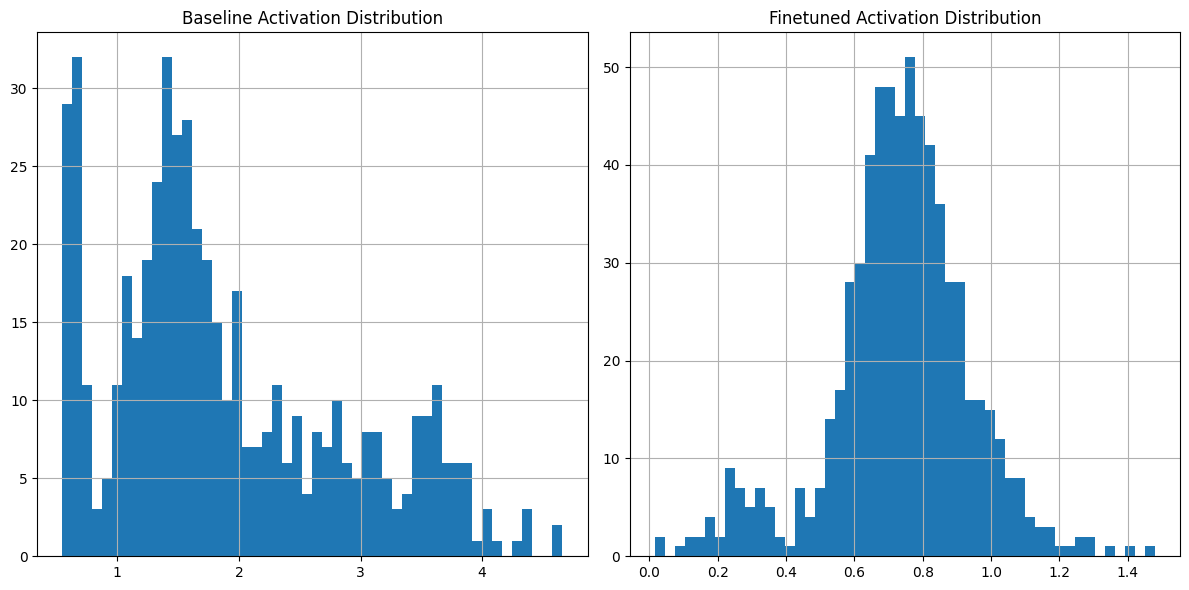


Mean activation (Baseline): 1.8885265225933203
Mean activation (Finetuned): 0.734344410876133
T-test results: t-statistic = 29.880720470973195, p-value = 3.181281384702643e-146

Number of common tokens: 141
Correlation of activations for common tokens: 0.024690014934192282


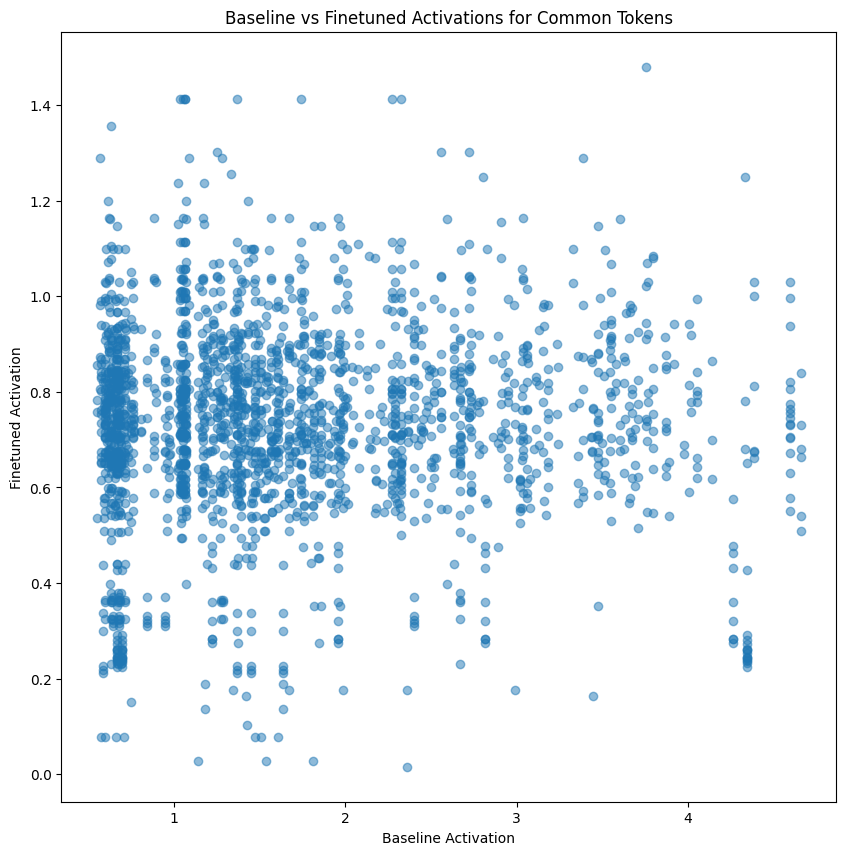

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the JSON data
with open('parsed_features.json', 'r') as f:
    data = json.load(f)

# Function to convert the nested dictionary to a DataFrame
def dict_to_df(data_dict):
    rows = []
    for feature, tokens in data_dict.items():
        for token, activation in tokens.items():
            rows.append({
                'feature': int(feature),
                'token': token,
                'activation': activation
            })
    return pd.DataFrame(rows)

# Create DataFrames for baseline and finetuned data
baseline_df = dict_to_df(data['baseline'])
finetuned_df = dict_to_df(data['finetuned'])

# Basic statistics
print("Baseline Statistics:")
print(baseline_df.describe())
print("\nFinetuned Statistics:")
print(finetuned_df.describe())

# Number of unique features and tokens
print(f"\nBaseline - number of features: {baseline_df['feature'].nunique()}")
print(f"Baseline - number of unique tokens: {baseline_df['token'].nunique()}")
print(f"Finetuned - number of features: {finetuned_df['feature'].nunique()}")
print(f"Finetuned - number of unique tokens: {finetuned_df['token'].nunique()}")

# Top 10 highest activating tokens for baseline and finetuned
print("\nTop 10 highest activating tokens (Baseline):")
print(baseline_df.nlargest(10, 'activation'))
print("\nTop 10 highest activating tokens (Finetuned):")
print(finetuned_df.nlargest(10, 'activation'))

# Distribution of activation values
plt.figure(figsize=(12, 6))
plt.subplot(121)
baseline_df['activation'].hist(bins=50)
plt.title('Baseline Activation Distribution')
plt.subplot(122)
finetuned_df['activation'].hist(bins=50)
plt.title('Finetuned Activation Distribution')
plt.tight_layout()
plt.show()

# Comparing mean activations
baseline_mean = baseline_df['activation'].mean()
finetuned_mean = finetuned_df['activation'].mean()
print(f"\nMean activation (Baseline): {baseline_mean}")
print(f"Mean activation (Finetuned): {finetuned_mean}")

# T-test to compare means
t_stat, p_value = stats.ttest_ind(baseline_df['activation'], finetuned_df['activation'])
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Common tokens between baseline and finetuned
common_tokens = set(baseline_df['token']) & set(finetuned_df['token'])
print(f"\nNumber of common tokens: {len(common_tokens)}")

# Correlation of activations for common tokens
common_df = pd.merge(baseline_df, finetuned_df, on=['token'], suffixes=('_baseline', '_finetuned'))
correlation = common_df['activation_baseline'].corr(common_df['activation_finetuned'])
print(f"Correlation of activations for common tokens: {correlation}")

# Scatter plot of baseline vs finetuned activations for common tokens
plt.figure(figsize=(10, 10))
plt.scatter(common_df['activation_baseline'], common_df['activation_finetuned'], alpha=0.5)
plt.xlabel('Baseline Activation')
plt.ylabel('Finetuned Activation')
plt.title('Baseline vs Finetuned Activations for Common Tokens')
plt.show()